## Python scripts to handle interfacial shear simulation results

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
'''
import sys
sys.path.append("/Users/dixu/Desktop/interfacial_analysis")
from interface import *
'''

Populating the interactive namespace from numpy and matplotlib


'\nimport sys\nsys.path.append("/Users/dixu/Desktop/interfacial_analysis")\nfrom interface import *\n'

In [7]:
#Global Constants
AREA = (20.5-0.5)*(20.341234-0.288675)

In [8]:
#readin histogram data
#assume only 1 dump 
def histo(file):
    f = open(file)
    heading=None
    x,y=[],[]
    for line in f:
        if line.startswith("#"):
            continue
        wd=line.split()
        if not heading: #heading not defined
            heading=wd
        else:
            x.append(wd[1])
            y.append(wd[2])
    f.close()
    x = map(float,x)
    y = map(float,y)
    f.close()
    return x,y,heading[2]

In [9]:
#file path setting
folder="/Users/dixu/Desktop/Interfacial_Slip/TOP_BOTTOM/SimulationDesign1/Sheet/12/e05/"

In [10]:
histoA=folder+"polyA.histo"
histoB=folder+"polyB.histo"
histoF=folder+"filler.histo"
Ax,Ay,Acount=histo(histoA)
Bx,By,Bcount=histo(histoB)
Fx,Fy,Fcount=histo(histoF)

In [11]:
all(Ax==Bx) and all(Bx==Fx) #x check
hist=pd.DataFrame(np.array([Ay,By,Fy]).transpose(),index=np.array(Ax),columns=["PolyA","PolyB","Filler"])
hist=hist[hist.any(axis=1)>0]
hist=hist.assign(A= hist.PolyA/(hist.PolyA+hist.PolyB+hist.Filler))
hist=hist.assign(B= hist.PolyB/(hist.PolyA+hist.PolyB+hist.Filler))
hist=hist.assign(F= hist.Filler/(hist.PolyA+hist.PolyB+hist.Filler))
binsize=Ax[1]-Ax[0]
hist=hist.assign(Width = 4*hist.A*(1-hist.A)*binsize)
sum(hist.Width)

1.6986741480411265

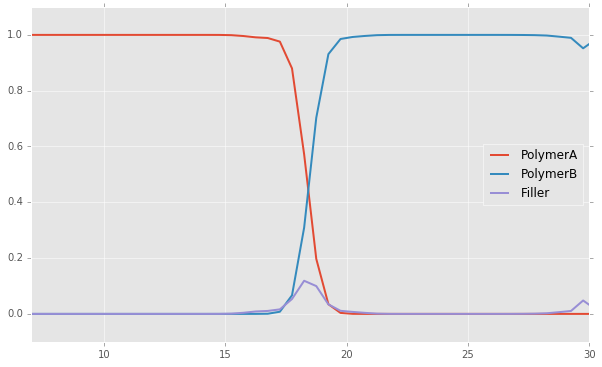

In [12]:
line1=plt.plot(hist.index,hist.A,label="PolymerA")
line2=plt.plot(hist.index,hist.B,label="PolymerB")
line3=plt.plot(hist.index,hist.F,label="Filler")
plt.xlabel("")
plt.ylim(-0.1,1.1)
plt.xlim(7,30)
plt.setp([line1,line2,line3],linewidth=2.0)
plt.legend(loc="best")
plt.savefig("Histogram.png",dpi=300)
plt.show()

In [13]:
def player(file):
#layered pressure file handler
    '''
    readin layered pressure data 
    '''
    f = open(file)
    heading=None
    res=[]
    count=0;
    for line in f:
        if line.startswith("#"):
            continue
        wd=line.split()
        if not heading: #heading not defined
            heading=map(int,wd)
        else:
            count+=1
            res.append([str(heading[0])]+wd)
            if count%heading[1]==0:
                count=0
                heading=None
    f.close()
    return res

In [14]:
pf2=folder+"Player2.txt"
press=pd.DataFrame(player(pf2),columns=["Step","Layer","Cord","N","Px","Py","Pz"])
press=press.convert_objects(convert_numeric=True)
binsize=press.iloc[1,2]-press.iloc[0,2]
press.head(5)

/Users/dixu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


,Step,Layer,Cord,N,Px,Py,Pz
0,15000000,1,0.179337,1379.300,-5.028780,-1.950820,0.013295
1,15000000,2,2.179340,661.900,-0.153830,0.101413,0.482081
2,15000000,3,4.179340,710.204,0.222872,0.054640,0.020424
3,15000000,4,6.179340,714.517,-0.140556,0.003259,-0.016614
4,15000000,5,8.179340,710.540,0.047086,0.046107,0.042078


(-0.5, 1.0)

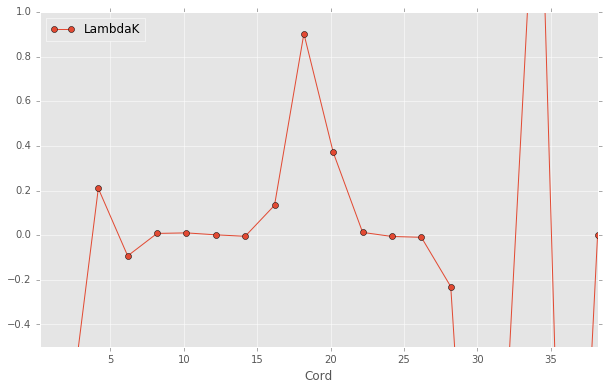

In [15]:
press["LambdaK"]=-press.N/AREA*(press.Pz-0.5*(press.Px+press.Py))  #2 is the bin size
pressure=press[press.Step==15000000].loc[:,["Cord","LambdaK"]]

pressure.plot(x="Cord",style="o-").set_ylim(-0.5,1.0)

In [16]:
tension=pressure[(pressure["Cord"]>10) & (pressure["Cord"]<26)]
print "Unit-less interfacial tension approximate: "+str(sum)

Unit-less interfacial tension approximate: <function sum at 0x109322b90>
